# Routing twice

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [13]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    finalstate1: int
    finalstate2: int


In [14]:
def first_adder(state: AgentState) -> AgentState:
    """this node adds up the number"""
    state['finalstate1'] = state['number1'] + state['number2']
    return state

def first_subtractor(state: AgentState) -> AgentState:
    """this node subtracts the first numbers"""
    state['finalstate1'] = state['number1'] - state['number2']
    return state

def second_adder(state: AgentState) -> AgentState:
    """this node adds up the second numbers"""
    state['finalstate2'] = state['number3'] + state['number4']
    return state

def second_subtractor(state: AgentState) -> AgentState:
    """this node subtracts the second numbers"""
    state['finalstate2'] = state['number3'] - state['number4']
    return state

def decide_next_node1(state: AgentState) -> str:
    """this node will choose the operation to do"""
    if state['operation1'] == "+":
        return "add_first"
    elif state['operation1'] == "-":
        return "subtract_first"

def decide_next_node2(state: AgentState) -> str:
    """this node will route the second operation"""
    if state['operation2'] == "+":
        return "add_second"
    elif state['operation2'] == "-":
        return "subtract_second"


In [16]:
graph = StateGraph(AgentState)

# Add computation nodes
graph.add_node("add_node", first_adder)
graph.add_node("subtract_node", first_subtractor)
graph.add_node("add_node2", second_adder)
graph.add_node("subtract_node2", second_subtractor)

# Add router/passthrough nodes
graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)

# Start graph
graph.add_edge(START, "router1")

# Conditional routing from router1
graph.add_conditional_edges("router1", decide_next_node1, {
    "add_first": "add_node",
    "subtract_first": "subtract_node"
})

# Route to second router
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

# Conditional routing from router2
graph.add_conditional_edges("router2", decide_next_node2, {
    "add_second": "add_node2",
    "subtract_second": "subtract_node2"
})

# End edges
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)


In [17]:
app = graph.compile()

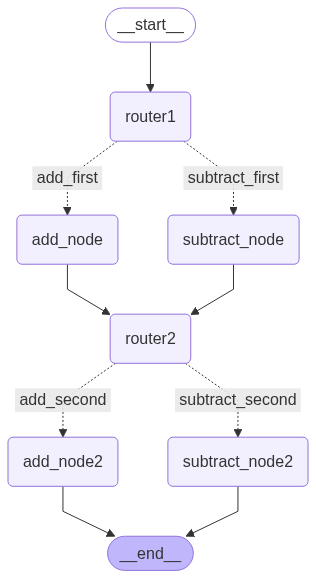

In [19]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))